In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

In [2]:
df = pd.read_csv('properties.csv')

/tmp/ipykernel_8746/1113565266.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('properties.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Columns: 145 entries, ID to Pantry Type
dtypes: float64(12), int64(93), object(40)
memory usage: 14.0+ MB


In [4]:
df.columns

Index(['ID', 'Possession Status', 'Availability Starts From', 'Floor No',
       'Commercial', 'Developer', 'Approved Authority Name', 'Units Available',
       'Price', 'Price (English)',
       ...
       'Rentable CommuniPfty Space', 'Retail Boulevard (Retail Shops)',
       'Cycling & Jogging Track', 'Fire Fighting Equipment',
       'Aesthetically designed landscape garden', 'Possession By', 'NRI Pref',
       'Land Area / Covered Area', 'Land Area Unit', 'Pantry Type'],
      dtype='object', length=145)

In [5]:
df.describe()

,ID,Units Available,Price,Maintenance Charges,Booking Amount,Covered Area,sqft Price,Carpet Area,Bathroom,bedroom,...,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Land Area / Covered Area,Land Area Unit
count,12685.000000,6135.000000,1.260100e+04,6.283000e+03,7.701000e+03,11374.000000,1.148000e+04,10133.000000,12616.000000,12685.000000,...,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,84.000000,86.000000
mean,6343.000000,7.751589,2.640261e+07,9.076812e+03,8.101702e+05,1037.746439,2.243507e+04,819.201224,2.143389,1.987150,...,0.540402,0.540323,0.536539,0.536855,0.537958,0.540166,0.544028,0.536382,7248.869048,12847.825581
std,3661.988417,26.335448,3.653648e+08,2.399983e+05,2.997549e+06,727.327389,3.187654e+05,585.037811,0.926965,0.943404,...,0.498385,0.498391,0.498683,0.498660,0.498577,0.498404,0.498077,0.498694,18240.893916,10.643078
min,1.000000,0.000000,1.000000e+05,0.000000e+00,0.000000e+00,10.000000,0.000000e+00,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12800.000000
25%,3172.000000,0.000000,7.000000e+06,1.000000e+01,1.000000e+05,605.500000,1.000000e+04,468.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,792.500000,12850.000000
50%,6343.000000,1.000000,1.350000e+07,2.500000e+03,5.000000e+05,850.000000,1.634850e+04,671.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,12850.000000
75%,9514.000000,5.000000,2.550000e+07,6.000000e+03,9.000000e+05,1200.000000,2.461500e+04,950.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3392.500000,12850.000000
max,12685.000000,750.000000,4.080000e+10,1.768000e+07,1.050000e+08,15006.000000,3.400000e+07,20870.000000,10.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100000.000000,12853.000000


In [6]:
df = df.sort_values(by='Price')

In [63]:
class Plotter:
  def plot_price_categories_by_summary_table(ax, df, title):
    category_order = ['low', 'medium', 'high']
    colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

    sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
    # sns.countplot(data=df, x='Price Category', hue="Price Category", palette=colors, order=category_order, ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel('Price Category')
    ax.set_ylabel('Count of Properties')
    # ax.set_ylim(0, max(df['Count']) + 5)
    
    # plt.ylim(0, max(subset['Count']) + 5)  # Adjust y-limit for better visualization
    plt.tight_layout()
  
  def plot_multi_bar_plot(ax, df, title, target_column):
    pivot_df = df.pivot(index=target_column, columns='Price Category', values='Count').fillna(0)

    pivot_df.plot(kind='bar', ax=ax)

    # Labels and title
    ax.set_xlabel('Cities')
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.legend(title='Price Category')

  def plot_pie_per_price_category(ax, category, df, title, target_field):
    ax.pie(df['Count'], labels=df[target_field] + ' (' + df['Count'].astype(str) + ')')
    ax.set_title(title)
    

In [70]:
def get_summary_table(df, group_by_column):
  summary_table = df.groupby([group_by_column, 'Price Category']).agg({
      'Price': ['count']
  }).reset_index()

  summary_table.columns = [group_by_column, 'Price Category', 'Count']

  category_order = ['low', 'medium', 'high']
  summary_table['Price Category'] = pd.Categorical(summary_table['Price Category'], categories=category_order, ordered=True)

  summary_table = summary_table.sort_values([group_by_column, 'Price Category']).reset_index(drop=True)
  
  unique_values_in_group_by_column = summary_table[group_by_column].unique()

  return summary_table, unique_values_in_group_by_column

# Task 1
```
As investors have diverse budget limits, split the overall opportunities into three different price ranges. Analyze the distribution of these price ranges across cities. (5 Marks)
```

In [71]:
low_threshold = df['Price'].quantile(0.33)
high_threshold = df['Price'].quantile(0.66)

def categorize_price(price):
    if price < low_threshold:
        return 'low'
    elif price < high_threshold:
        return 'medium'
    else:
        return 'high'
    
df['Price Category'] = df['Price'].apply(categorize_price)

summary_table = df.groupby('Price Category').agg({
    'Price': ['mean', 'std', 'min', 'max', 'count']
}).reset_index()

summary_table.columns = ['Price Category', 'Mean', 'Std Dev', 'Min', 'Max', 'Count']

category_order = ['low', 'medium', 'high']
summary_table['Price Category'] = pd.Categorical(summary_table['Price Category'], categories=category_order, ordered=True)
summary_table = summary_table.sort_values('Price Category').reset_index(drop=True)
print(tabulate(summary_table, headers='keys', tablefmt='pretty'))

+---+----------------+--------------------+--------------------+------------+---------------+-------+
|   | Price Category |        Mean        |      Std Dev       |    Min     |      Max      | Count |
+---+----------------+--------------------+--------------------+------------+---------------+-------+
| 0 |      low       | 5138200.357056695  | 2029363.1047203515 |  100000.0  |   8650000.0   | 4145  |
| 1 |     medium     | 13541293.728036486 | 3216797.692059702  | 8700000.0  |  19780000.0   | 4166  |
| 2 |      high      | 59437872.96969697  | 624868752.6113695  | 19800000.0 | 40800000001.0 | 4290  |
+---+----------------+--------------------+--------------------+------------+---------------+-------+


/tmp/ipykernel_8746/2722837638.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)


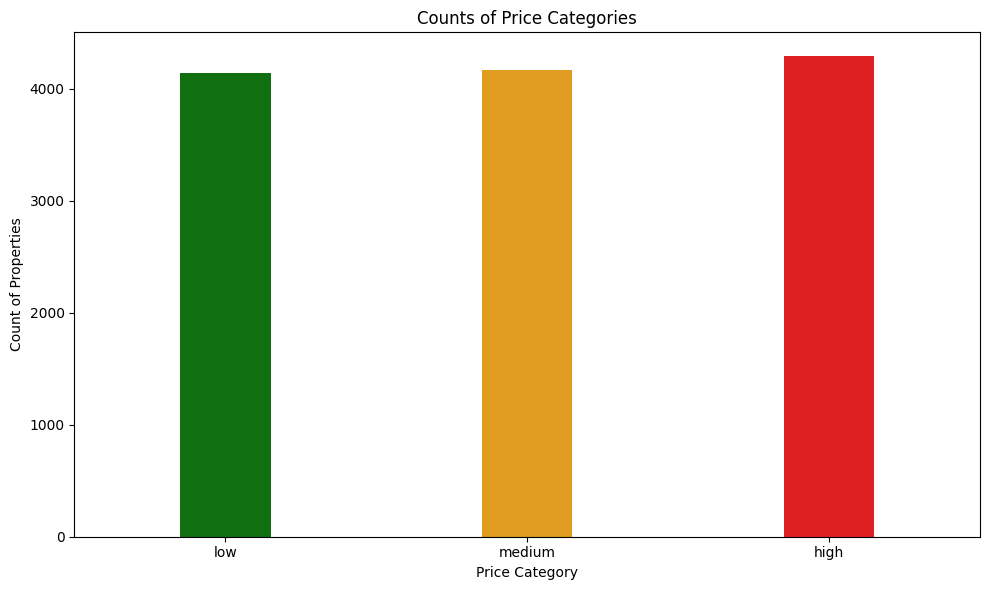

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
Plotter.plot_price_categories_by_summary_table(ax, summary_table, title='Counts of Price Categories')
plt.show()

+----+-----------+----------------+-------+
|    |   City    | Price Category | Count |
+----+-----------+----------------+-------+
| 0  | Agartala  |      low       |   1   |
| 1  | Bhiwandi  |      low       |   2   |
| 2  |  Gurgaon  |      low       |   1   |
| 3  | Hyderabad |      low       |   8   |
| 4  |  Kalyan   |      low       |   7   |
| 5  |  Kalyan   |     medium     |   2   |
| 6  |  Mumbai   |      low       | 2026  |
| 7  |  Mumbai   |     medium     | 2604  |
| 8  |  Mumbai   |      high      | 3865  |
| 9  |  Nagpur   |      low       |   5   |
| 10 |  Nagpur   |     medium     |   2   |
| 11 |  Palghar  |      low       |   2   |
| 12 |   Thane   |      low       | 2093  |
| 13 |   Thane   |     medium     | 1558  |
| 14 |   Thane   |      high      |  425  |
+----+-----------+----------------+-------+


/tmp/ipykernel_8746/3045609719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/tmp/ipykernel_8746/3045609719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/tmp/ipykernel_8746/3045609719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/tmp/ipyke

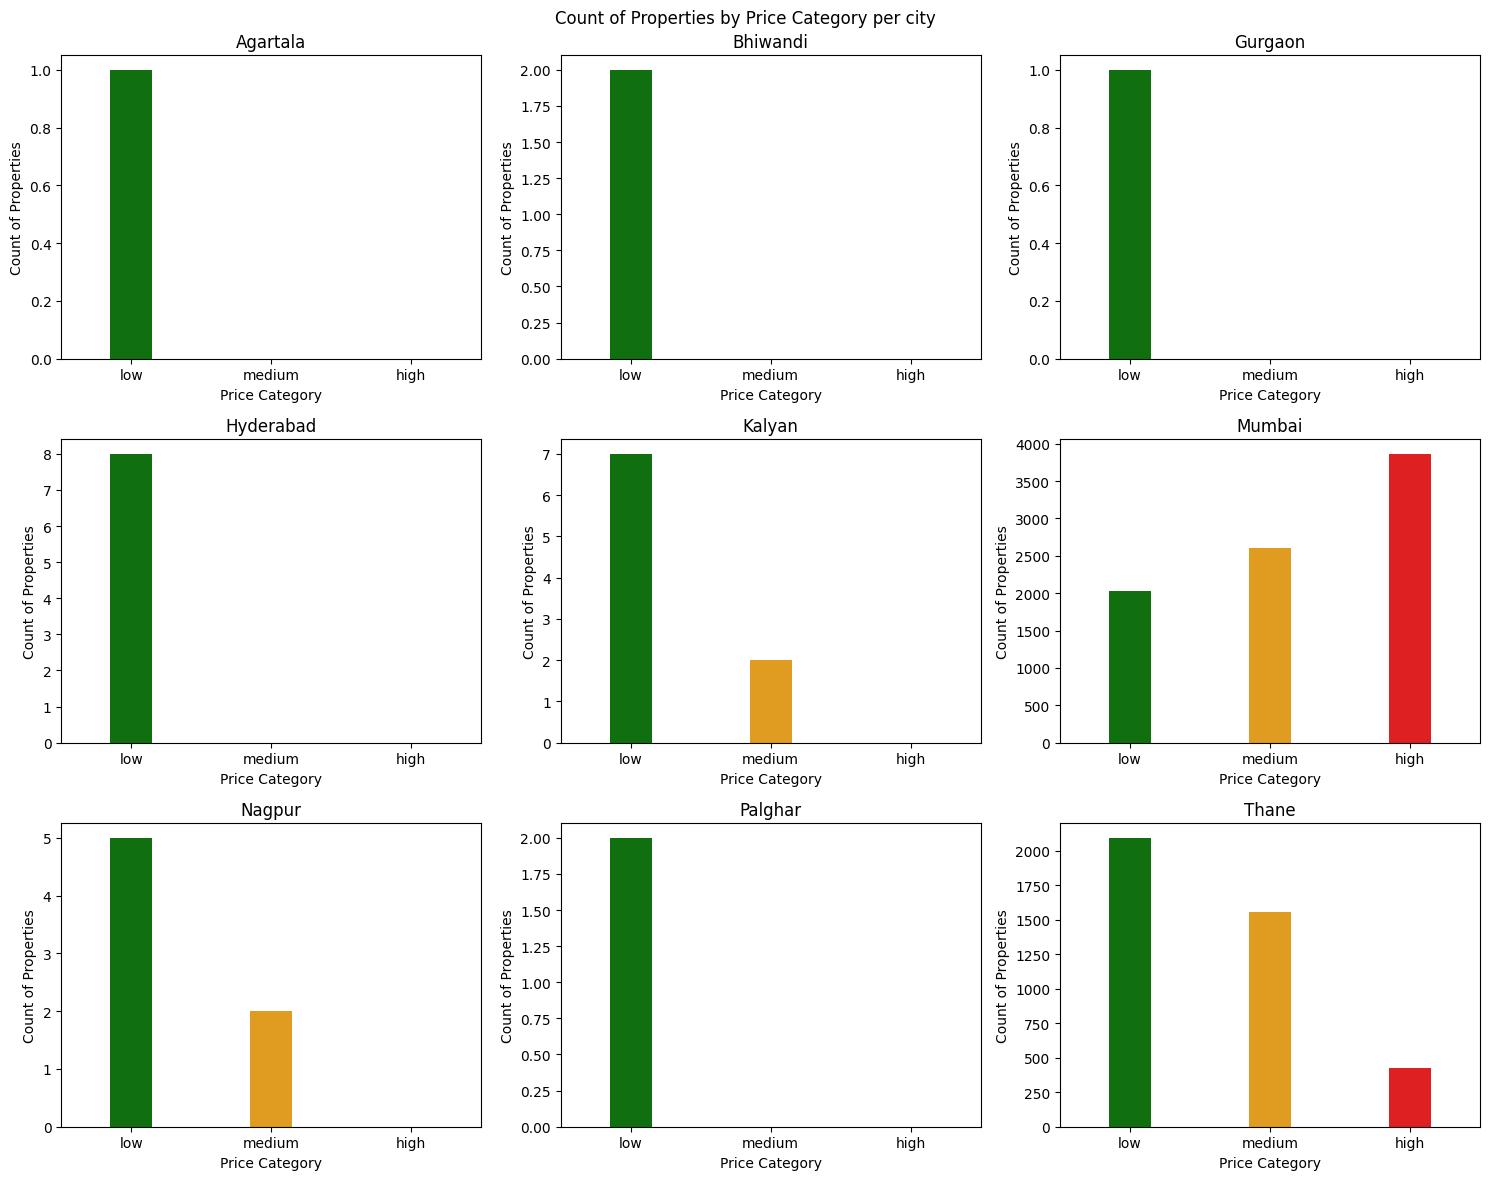

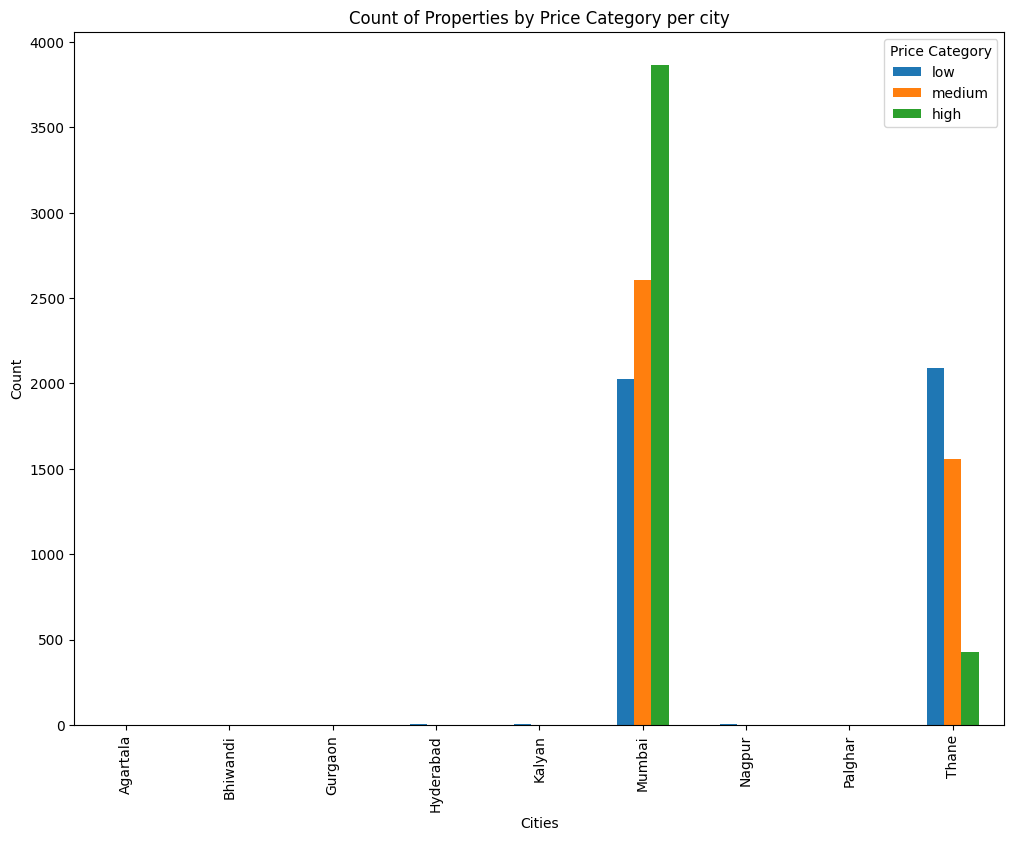

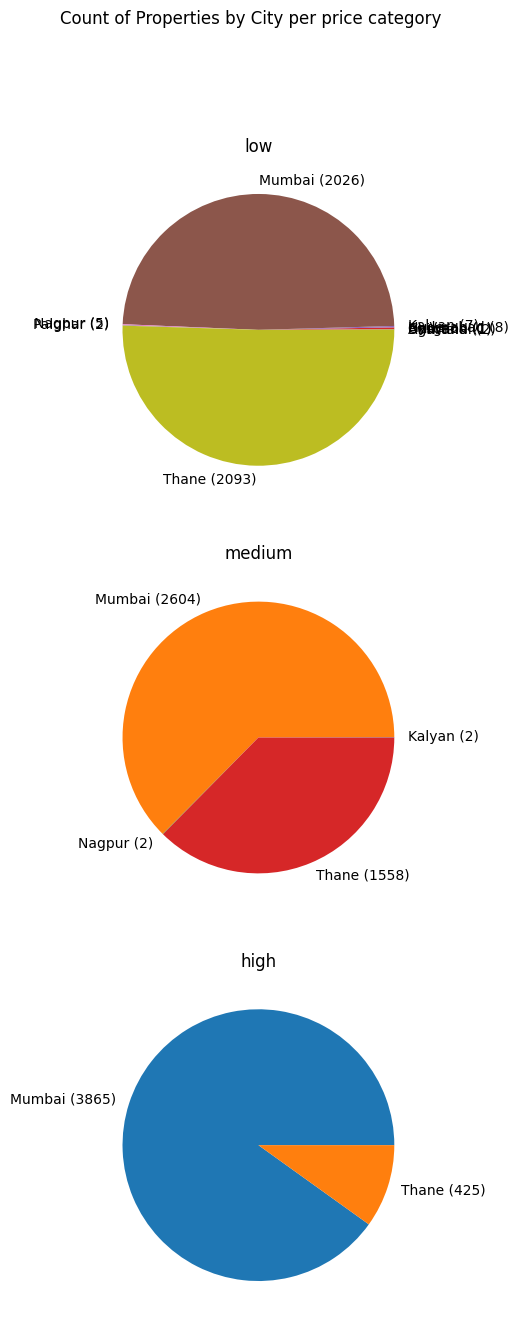

In [72]:
summary_table, cities = get_summary_table(df, group_by_column='City')

print(tabulate(summary_table, headers='keys', tablefmt='pretty'))


fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
fig.suptitle('Count of Properties by Price Category per city')

for (ax, city) in zip(axes,cities):
    subset = summary_table[summary_table['City'] == city]
    Plotter.plot_price_categories_by_summary_table(ax, subset, title=f'{city}')

plt.show()

# Multibar plot
fig, ax = plt.subplots(figsize=(12, 9))
Plotter.plot_multi_bar_plot(ax, summary_table, title='Count of Properties by Price Category per city', target_column='City')
plt.show()

# Pie charts
fig, axes = plt.subplots(3, 1, figsize=(6, 15))
axes = axes.flatten()
fig.suptitle('Count of Properties by City per price category')

for (ax, category) in zip(axes,['low', 'medium', 'high']):
    subset = summary_table[summary_table['Price Category'] == category]
    Plotter.plot_pie_per_price_category(ax, category=category, df=subset, title=f'{category}', target_field='City')

plt.show()

# Task 2
```
Provide investors with a high-level summary of the whole data using the price range dimensions. Consider factors like property type, city, and key amenities. What method/tool would you use to present this information effectively? (5 Marks)
```

+----+-------------------------+----------------+-------+
|    |    Type of Property     | Price Category | Count |
+----+-------------------------+----------------+-------+
| 0  |        Apartment        |      low       | 3858  |
| 1  |        Apartment        |     medium     | 4064  |
| 2  |        Apartment        |      high      | 4115  |
| 3  | Builder Floor Apartment |      low       |  145  |
| 4  | Builder Floor Apartment |     medium     |  38   |
| 5  | Builder Floor Apartment |      high      |  22   |
| 6  |        Penthouse        |      low       |   1   |
| 7  |        Penthouse        |     medium     |   2   |
| 8  |        Penthouse        |      high      |  35   |
| 9  |    Residential House    |      low       |  126  |
| 10 |    Residential House    |     medium     |  53   |
| 11 |    Residential House    |      high      |  63   |
| 12 |          Villa          |      low       |  15   |
| 13 |          Villa          |     medium     |   9   |
| 14 |        

/tmp/ipykernel_8746/3045609719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/tmp/ipykernel_8746/3045609719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/tmp/ipykernel_8746/3045609719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/tmp/ipyke

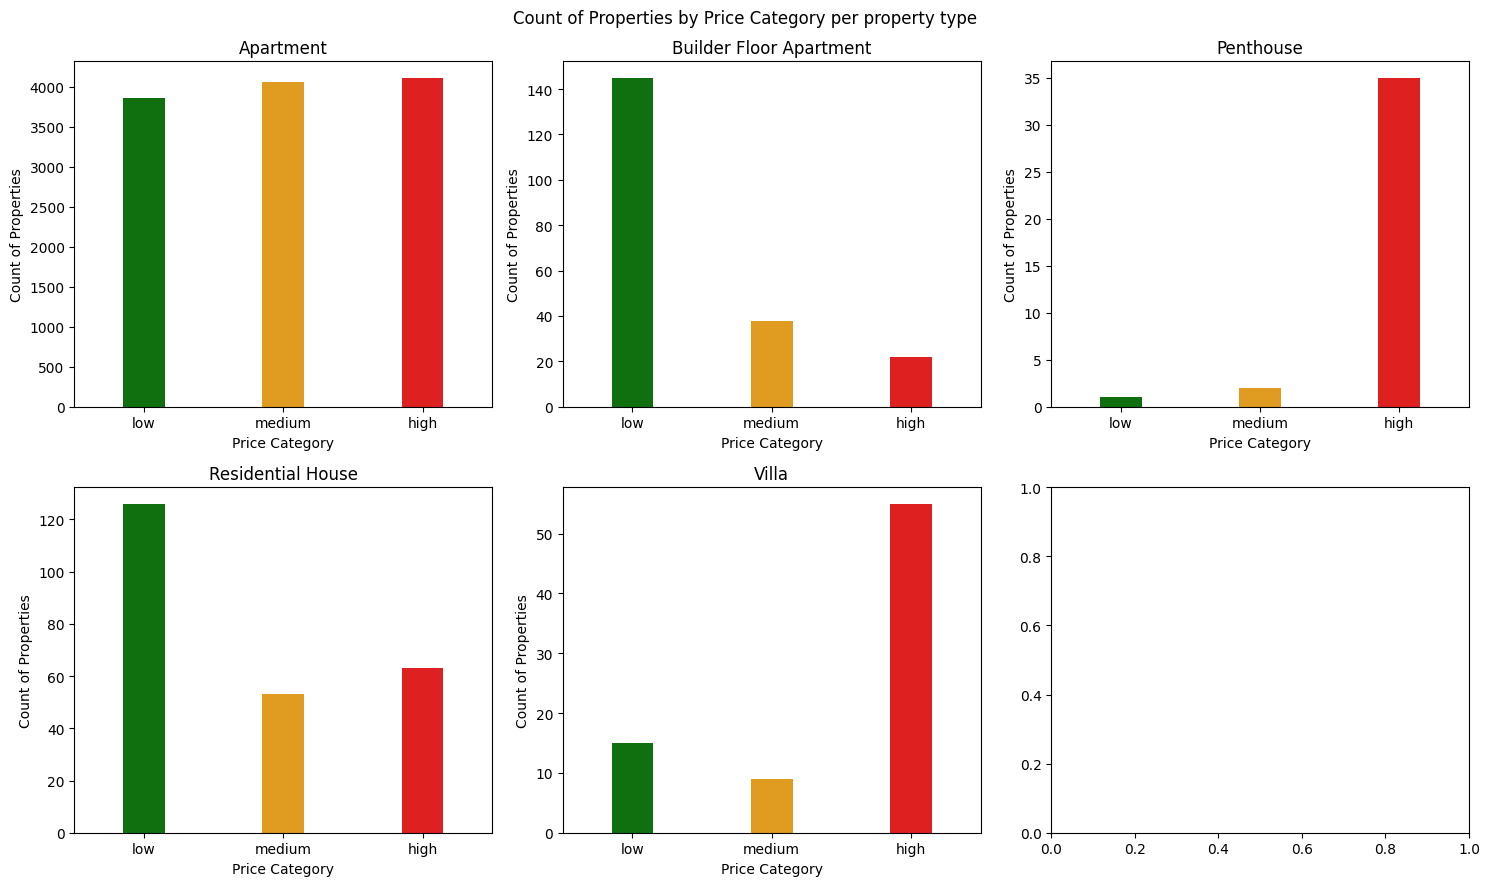

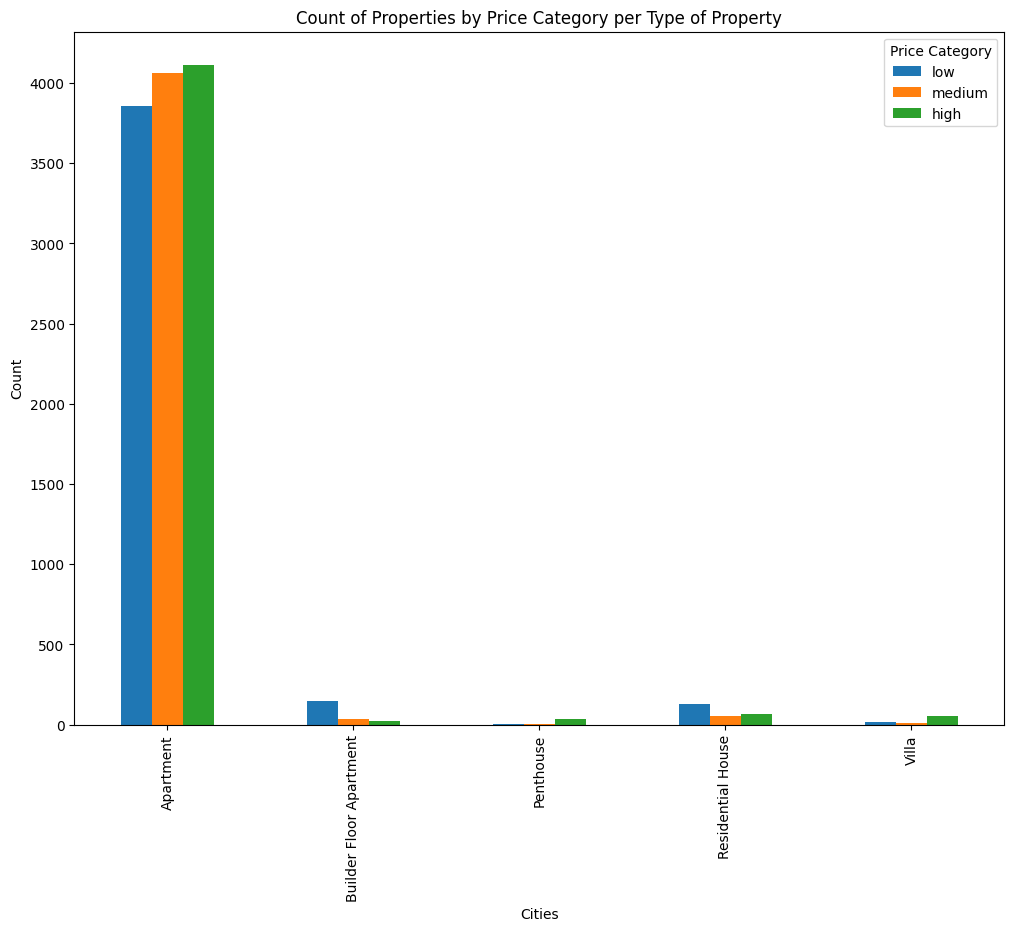

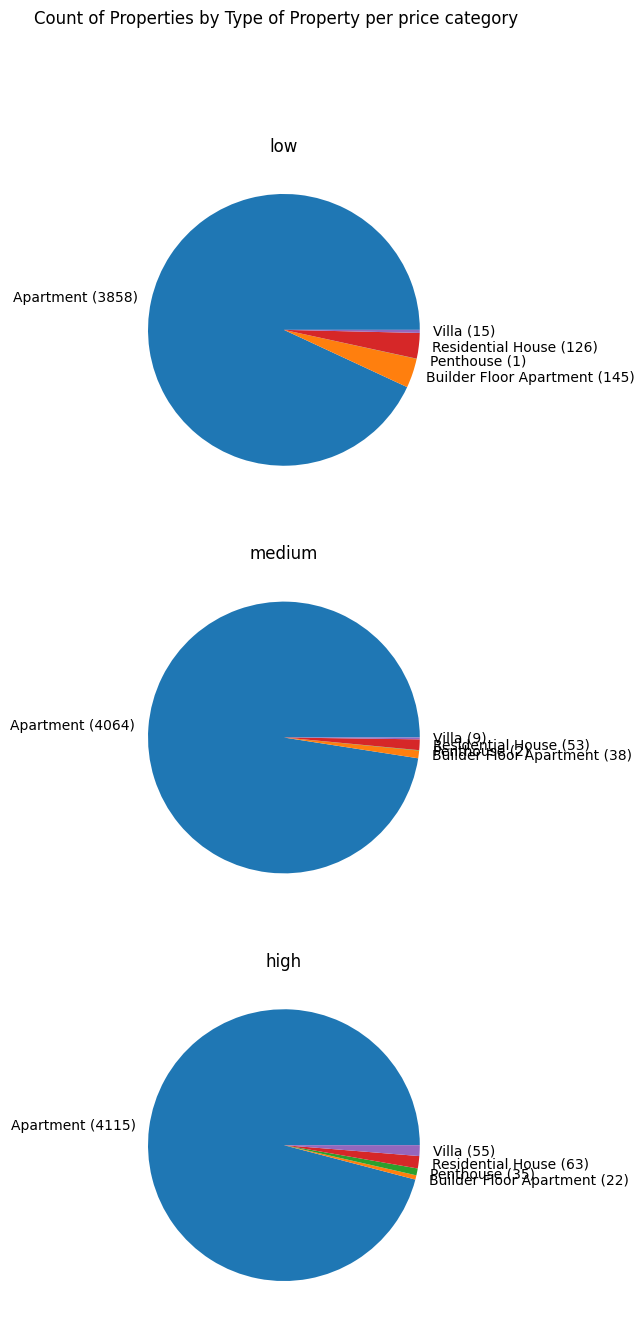

In [73]:
summary_table, property_types = get_summary_table(df,group_by_column='Type of Property')

print(tabulate(summary_table, headers='keys', tablefmt='pretty'))
    
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()
fig.suptitle('Count of Properties by Price Category per property type')

for (ax, property_type) in zip(axes,property_types):
    subset = summary_table[summary_table['Type of Property'] == property_type]
    Plotter.plot_price_categories_by_summary_table(ax, subset, title=f'{property_type}')

plt.show()

# Multibar plot
fig, ax = plt.subplots(figsize=(12, 9))
Plotter.plot_multi_bar_plot(ax, summary_table, title='Count of Properties by Price Category per Type of Property', target_column='Type of Property')
plt.show()

# Pie charts
fig, axes = plt.subplots(3, 1, figsize=(6, 15))
axes = axes.flatten()
fig.suptitle('Count of Properties by Type of Property per price category')

for (ax, category) in zip(axes,['low', 'medium', 'high']):
    subset = summary_table[summary_table['Price Category'] == category]
    Plotter.plot_pie_per_price_category(ax, category=category, df=subset, title=f'{category}', target_field='Type of Property')

plt.show()

+----+-----------+----------------+-------+
|    |   City    | Price Category | Count |
+----+-----------+----------------+-------+
| 0  | Agartala  |      low       |   1   |
| 1  | Bhiwandi  |      low       |   2   |
| 2  |  Gurgaon  |      low       |   1   |
| 3  | Hyderabad |      low       |   8   |
| 4  |  Kalyan   |      low       |   7   |
| 5  |  Kalyan   |     medium     |   2   |
| 6  |  Mumbai   |      low       | 2026  |
| 7  |  Mumbai   |     medium     | 2604  |
| 8  |  Mumbai   |      high      | 3865  |
| 9  |  Nagpur   |      low       |   5   |
| 10 |  Nagpur   |     medium     |   2   |
| 11 |  Palghar  |      low       |   2   |
| 12 |   Thane   |      low       | 2093  |
| 13 |   Thane   |     medium     | 1558  |
| 14 |   Thane   |      high      |  425  |
+----+-----------+----------------+-------+


/tmp/ipykernel_8746/3045609719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/tmp/ipykernel_8746/3045609719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/tmp/ipykernel_8746/3045609719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/tmp/ipyke

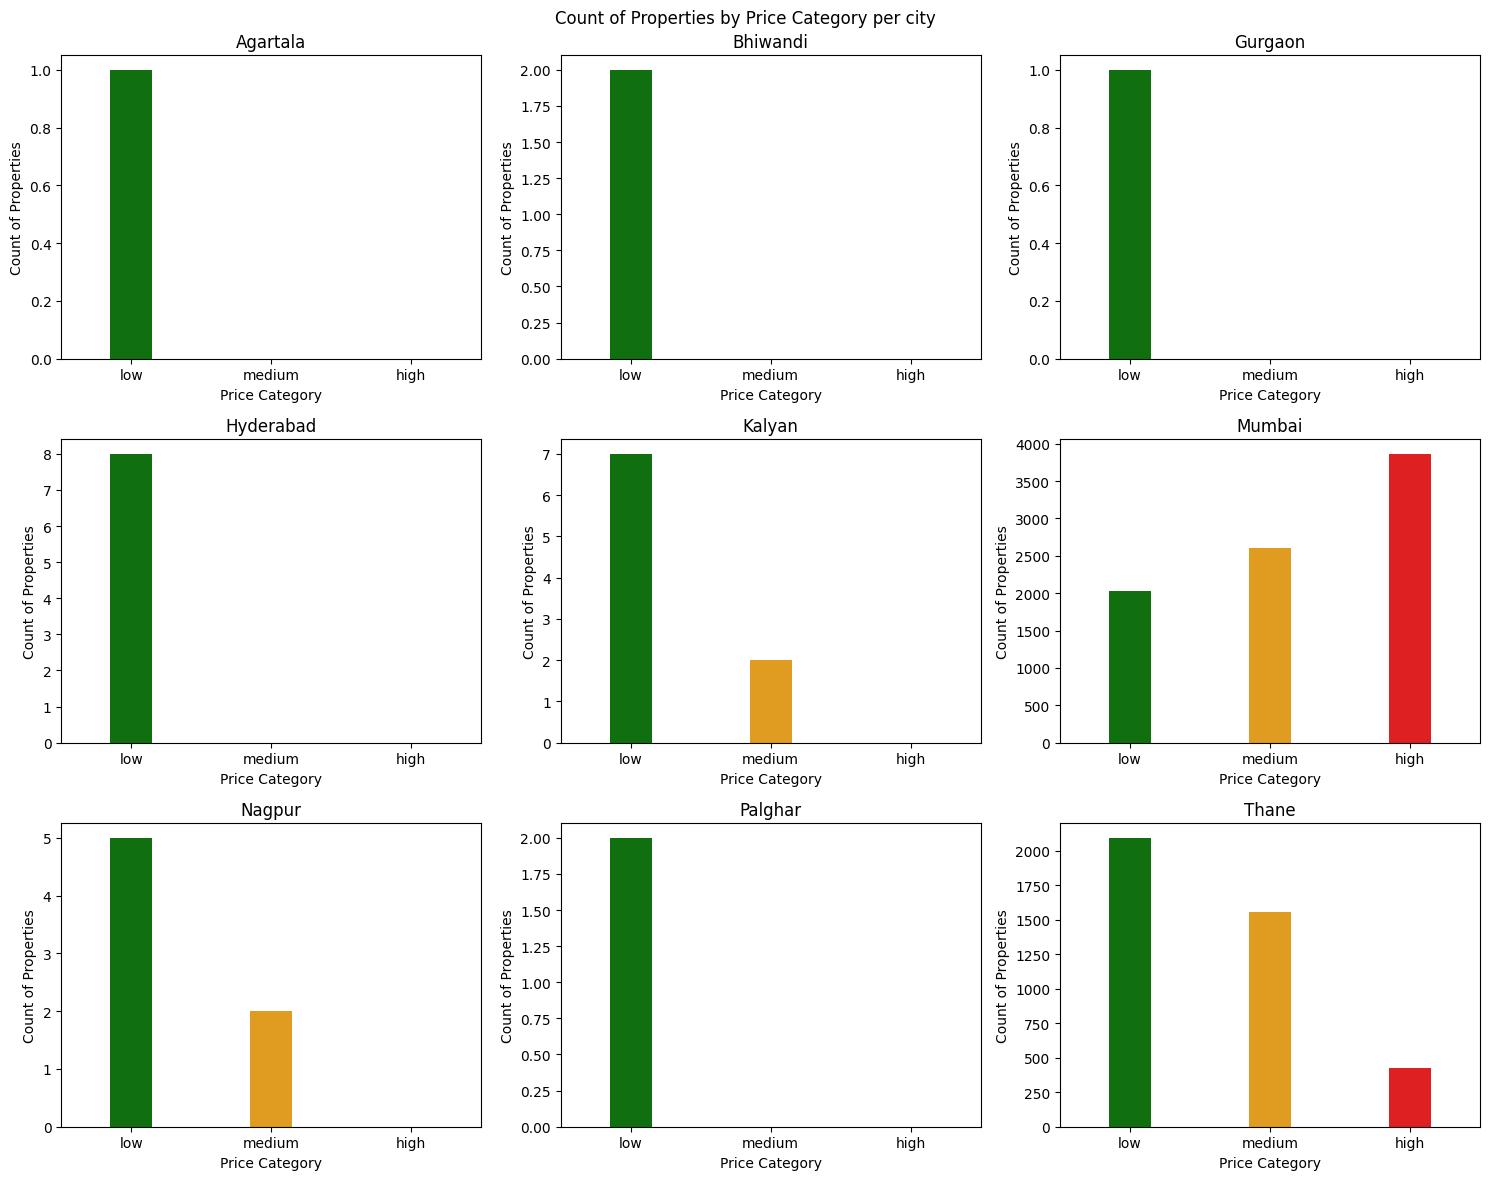

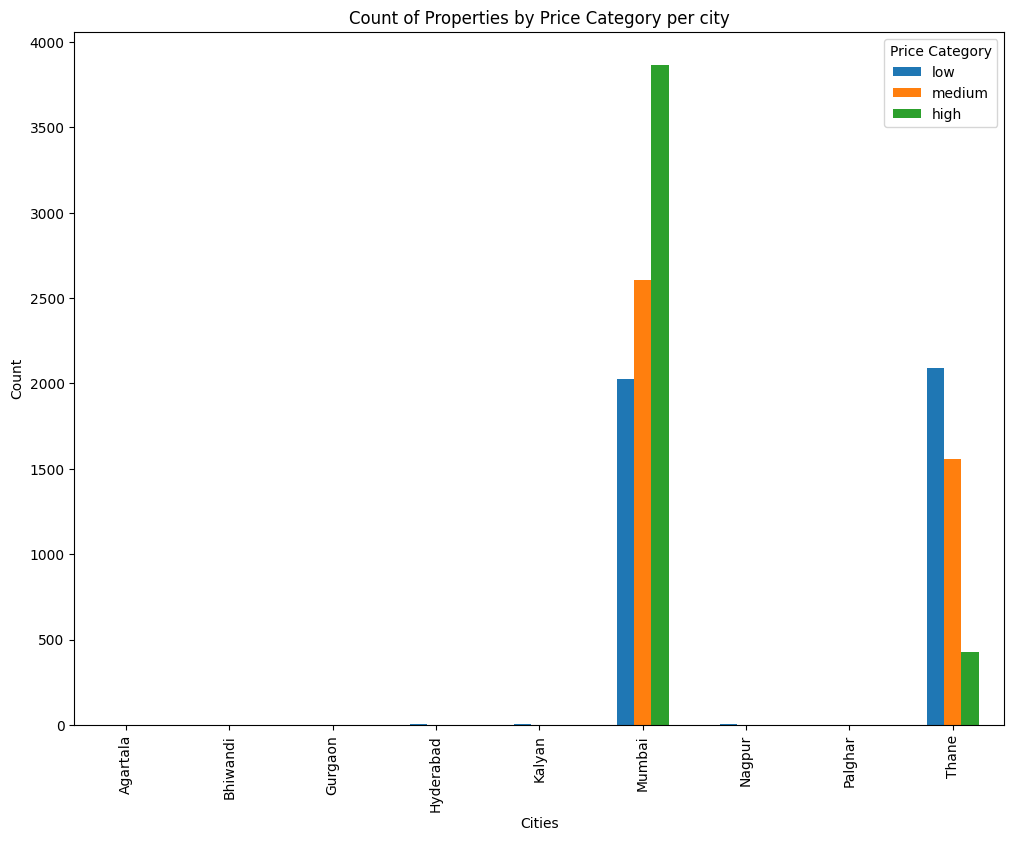

In [74]:
summary_table, cities = get_summary_table(df, group_by_column='City')

print(tabulate(summary_table, headers='keys', tablefmt='pretty'))


fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
fig.suptitle('Count of Properties by Price Category per city')

for (ax, city) in zip(axes,cities):
    subset = summary_table[summary_table['City'] == city]
    Plotter.plot_price_categories_by_summary_table(ax, subset, title=f'{city}')

plt.show()

# Multibar plot
fig, ax = plt.subplots(figsize=(12, 9))
Plotter.plot_multi_bar_plot(ax, summary_table, title='Count of Properties by Price Category per city', target_column='City')
plt.show()

# Pie charts
fig, axes = plt.subplots(3, 1, figsize=(6, 15))
axes = axes.flatten()
fig.suptitle('Count of Properties by City per price category')

for (ax, category) in zip(axes,['low', 'medium', 'high']):
    subset = summary_table[summary_table['Price Category'] == category]
    Plotter.plot_pie_per_price_category(ax, category=category, df=subset, title=f'{category}', target_field='City')

plt.show()

In [ ]:
amenities_list = [
  'Power Back Up',
  'Lift',
  'Rain Water Harvesting',
  'Club House',
  'Swimming Pool',
  'Gymnasium',
  'Park',
  'Parking',
  'Security',
  'Water Storage',
  'Private Terrace/Garden',
  'Air Conditioned',
  'Visitor Parking',
  'Intercom Facility',
  'Waste Disposal',
  'Laundry Service',
  'Internet/Wi-Fi Connectivity',
  'DTH Television Facility',
  'RO Water System',
  'Banquet Hall',
  'Bar/Lounge',
  'Cafeteria/Food Court',
  'Conference Room',
  'Piped Gas',
  'Jogging and Strolling Track',
]

